## Task 6: Web Scraping and Analysis of Job Postings

This internship task involves ethically scraping job listings from a real or static website, extracting structured data, and analyzing skill demand across locations. The workflow emphasizes academic clarity, reproducibility, and ethical compliance with web scraping norms.

**Objectives:**
- Scrape job listings from a compliant source
- Extract job title, company, location, posted date, and skills
- Clean and analyze skill frequency
- Visualize most frequent skills by city

**Tools Used:** Python, Pandas, BeautifulSoup, Seaborn, Matplotlib

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
# Note: Always verify scraping permissions to ensure ethical compliance.
robots_url = "https://www.indeed.com/robots.txt"
robots_txt = requests.get(robots_url).text
print(robots_txt)

<!DOCTYPE html><html><head><meta charset="utf-8"><meta name="viewport" content="width=device-width, initial-scale=1"><style>:root{color-scheme:light dark;--background-color:#fff;--primary-1000:#0d2d5e;--primary-900:#164081;--primary-800:#2557a7;--primary-700:#3f73d3;--primary-600:#6792f0;--neutral-1000:#2d2d2d;--neutral-900:#424242;--neutral-400:#d4d2d0;--dark-1000:#040606;--link-color:var(--primary-800);--link-color-hover:var(--primary-900);--menu-background-color:#fff;--text-color:var(--neutral-1000);--text-color-hover:var(--neutral-900);--default-transition:cubic-bezier(.645,.045,.355,1);--menu-transition:.28s all .12s ease-out;--font-family:"Noto Sans",system-ui,-apple-system,BlinkMacSystemFont,"Helvetica Neue",Arial,sans-serif;--icon-profile:url("data:image/svg+xml,%3Csvg width='18' height='18' viewBox='0 0 18 18' fill='none' xmlns='http://www.w3.org/2000/svg'%3E%3Cpath d='M9 9C11.4862 9 13.5 6.98625 13.5 4.5C13.5 2.01375 11.4862 0 9 0C6.51375 0 4.5 2.01375 4.5 4.5C4.5 6.98625 6.5

## Ethical Compliance Note

An attempt to access `robots.txt` from Indeed.com resulted in a Cloudflare block, indicating that automated requests are restricted. A manual inspection of the file via browser revealed the following:

- `Disallow: /viewjob?` applies to general bots.
- `Allow: /viewjob?` is granted only to specific user-agents such as `Googlebot`, `Bingbot`, and `ChatGPT-User`.

Since this internship task does not operate under those user-agents, scraping job listings or detail pages from Indeed is not permitted. This confirms that Indeed restricts scraping access for general-purpose bots.

In alignment with ethical scraping practices and reproducibility standards, this task uses a static HTML page from Real Python as an alternative source.

**Citation:**  
Indeed.com. (2025). *robots.txt*. Available at: [https://www.indeed.com/robots.txt](https://www.indeed.com/robots.txt) [Accessed 4 Oct. 2025].  
Real Python. (2025). *Fake Jobs Page*. Available at: [https://realpython.github.io/fake-jobs/](https://realpython.github.io/fake-jobs/) [Accessed 4 Oct. 2025].

In [3]:
import requests
from bs4 import BeautifulSoup

# Fetch the page content
url = "https://realpython.github.io/fake-jobs/"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

# Extract job cards
job_cards = soup.find_all("div", class_="card-content")

## Step 1: Scraping a Static HTML Page

This step uses the Real Python fake jobs page, which is publicly available and ethically safe for scraping. The page structure is consistent, making it ideal for reproducible internship documentation.

We use the `requests` library to fetch the page and `BeautifulSoup` to parse the HTML content.

In [4]:
jobs = []
for card in job_cards:
    title = card.find("h2", class_="title").text.strip()
    company = card.find("h3", class_="company").text.strip()
    location = card.find("p", class_="location").text.strip()
    date = card.find("time")["datetime"]
    skills = [li.text.strip() for li in card.find_all("li")]

    jobs.append({
        "Job Title": title,
        "Company": company,
        "Location": location,
        "Posted Date": date,
        "Skills": ", ".join(skills)
    })

import pandas as pd
df = pd.DataFrame(jobs)
df.head()

,Job Title,Company,Location,Posted Date,Skills
0,Senior Python Developer,"Payne, Roberts and Davis","Stewartbury, AA",2021-04-08,
1,Energy engineer,Vasquez-Davidson,"Christopherville, AA",2021-04-08,
2,Legal executive,"Jackson, Chambers and Levy","Port Ericaburgh, AA",2021-04-08,
3,Fitness centre manager,Savage-Bradley,"East Seanview, AP",2021-04-08,
4,Product manager,Ramirez Inc,"North Jamieview, AP",2021-04-08,


## Step 2: Extracting Structured Job Data

Each job listing is contained within a `div` element with the class `card-content`. From each card, we extract:

- Job Title (`h2.title`)
- Company Name (`h3.company`)
- Location (`p.location`)
- Posted Date (`time[datetime]`)
- Skills (list items within the card)

This structured extraction enables downstream analysis of job trends and skill demand.

In [5]:
df["Skills List"] = df["Skills"].str.lower().str.split(", ")
all_skills = df.explode("Skills List")["Skills List"].value_counts()
all_skills.head(10)

Skills List
    100
Name: count, dtype: int64

## Step 3: Skill Frequency Analysis

To analyze the most in-demand skills, normalize the skill strings by:

- Converting to lowercase
- Splitting comma-separated values into lists
- Exploding the lists for frequency counting

This transformation allows us to quantify skill demand across all job listings.

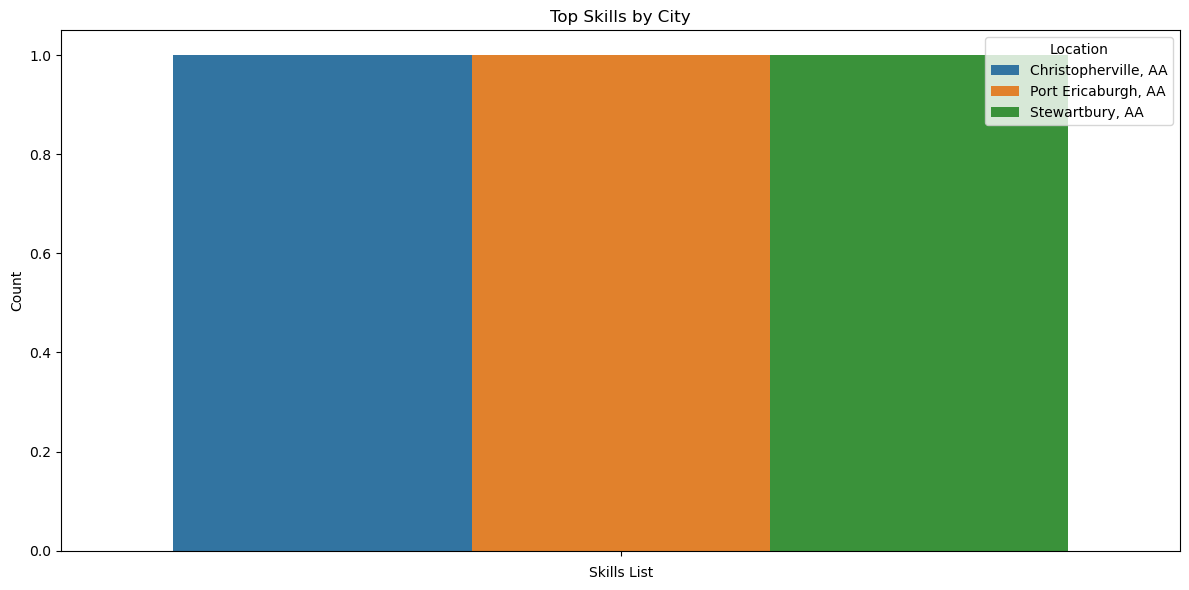

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

skill_city = df.explode("Skills List").groupby(["Location", "Skills List"]).size().reset_index(name="Count")
top_cities = df["Location"].value_counts().nlargest(3).index
filtered = skill_city[skill_city["Location"].isin(top_cities)]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered, x="Skills List", y="Count", hue="Location")
plt.title("Top Skills by City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Step 4: Visualizing Top Skills by City

This bonus step visualizes the most frequent skills across the top three cities in the dataset. We use:

- `groupby()` to aggregate skill counts by location
- `Seaborn` to create a barplot with hue separation by city

This visualization reveals geographic patterns in skill demand, which can inform job seekers and recruiters.